In [2]:
import pandas as pd
import numpy as np
from pprint import pprint

In [3]:
datafile = 'train.csv'

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Read Data
data = pd.read_csv(datafile)

# 필요없는 요소 drop
data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

# 성별 -> label encoding
encoder1 = LabelEncoder()
encoder1.fit(data.Sex)
data.Sex = encoder1.transform(data.Sex) # female : 0, male : 1

# Embarked -> one hot encoding
data = pd.get_dummies(data, columns=['Embarked']) 

# 비어 있는 행 drop
train_data = data[:600].dropna()
test_data = data[600:].dropna()

# feature 분리
train_X = train_data.drop(['Survived'],axis=1)
train_Y = train_data.Survived
test_X = test_data.drop(['Survived'],axis=1)
test_Y = test_data.Survived

print(train_X)
print(train_Y)
print(test_X)
print(test_Y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         3    1  22.0      1      0   7.2500           0           0   
1         1    0  38.0      1      0  71.2833           1           0   
2         3    0  26.0      0      0   7.9250           0           0   
3         1    0  35.0      1      0  53.1000           0           0   
4         3    1  35.0      0      0   8.0500           0           0   
..      ...  ...   ...    ...    ...      ...         ...         ...   
592       3    1  47.0      0      0   7.2500           0           0   
594       2    1  37.0      1      0  26.0000           0           0   
595       3    1  36.0      1      1  24.1500           0           0   
597       3    1  49.0      0      0   0.0000           0           0   
599       1    1  49.0      1      0  56.9292           1           0   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Accuracy, F1-Score   
def confusionMatrix(pred):
    cm = confusion_matrix(test_Y,pred)
    print(cm)
    tp,fn,fp,tn =cm[0][0], cm[0][1], cm[1][0],cm[1][1]
    acc = (tp+tn)/(tp+fp+tn+fn)
    prec = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*prec*recall) / (prec+recall)

    print('Accurcy :{}, F1-score :{}\n'.format(acc,f1))


In [6]:
# Desicion Tree
def model_fitting(max_depth):
    model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    model.fit(train_X,train_Y)

    plt.figure( figsize=(20,15) )
    tree.plot_tree(model,                
                feature_names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S'],
                impurity=True, filled=True,
    )

    pred = model.predict(test_X)
    
    confusionMatrix(pred)



[[125  21]
 [ 34  60]]
Accurcy :0.7708333333333334, F1-score :0.8196721311475409

[[139   7]
 [ 39  55]]
Accurcy :0.8083333333333333, F1-score :0.8580246913580246

[[133  13]
 [ 26  68]]
Accurcy :0.8375, F1-score :0.8721311475409836

[[129  17]
 [ 29  65]]
Accurcy :0.8083333333333333, F1-score :0.8486842105263157

[[115  31]
 [ 29  65]]
Accurcy :0.75, F1-score :0.7931034482758622



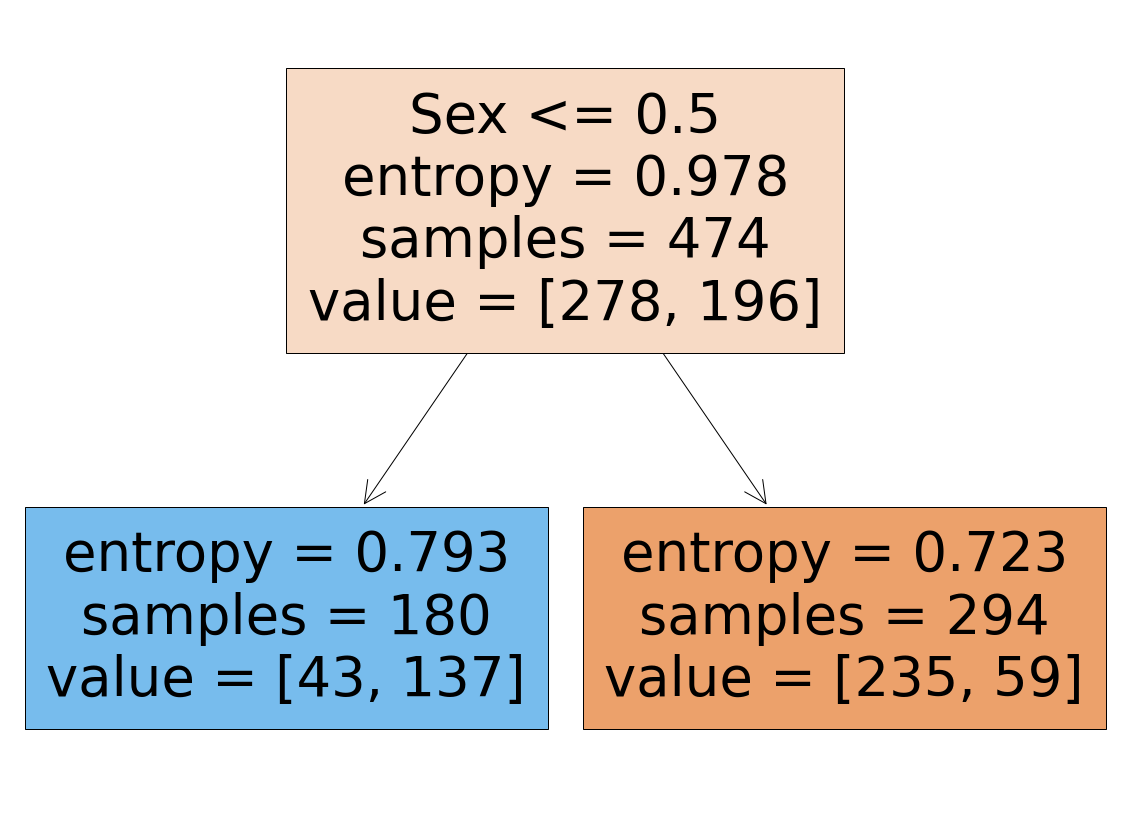

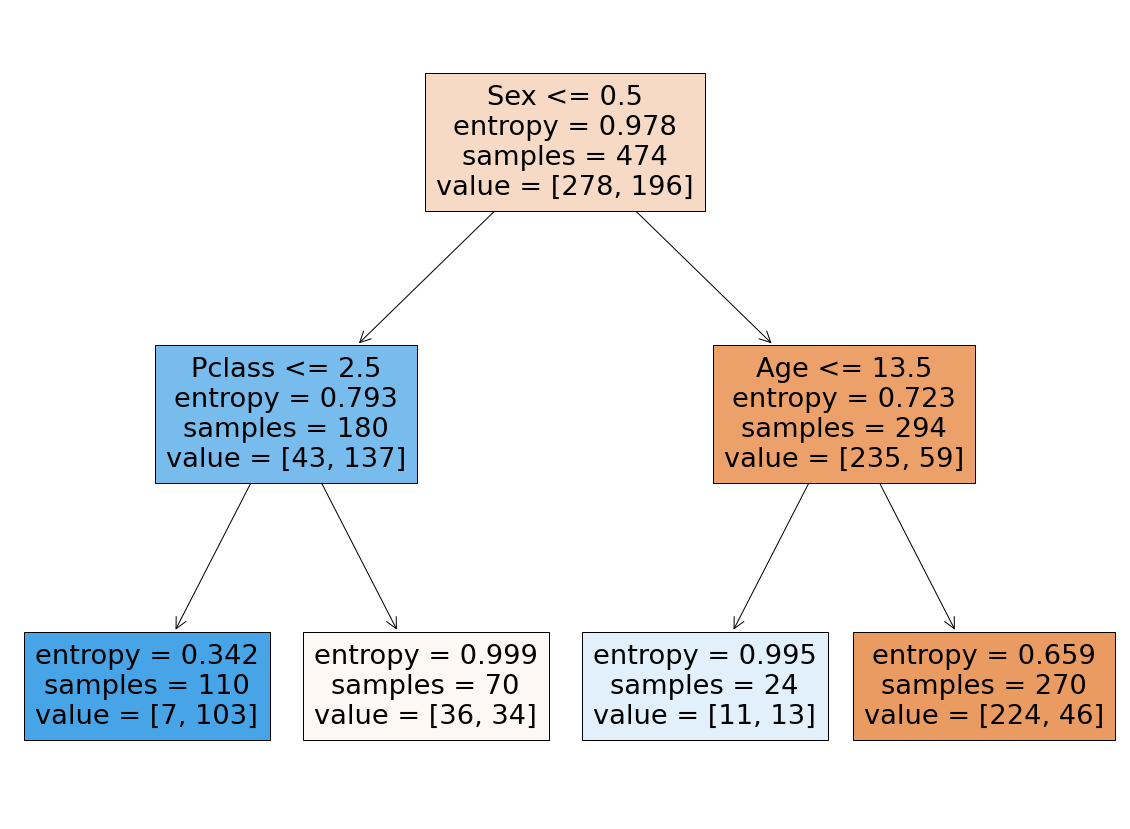

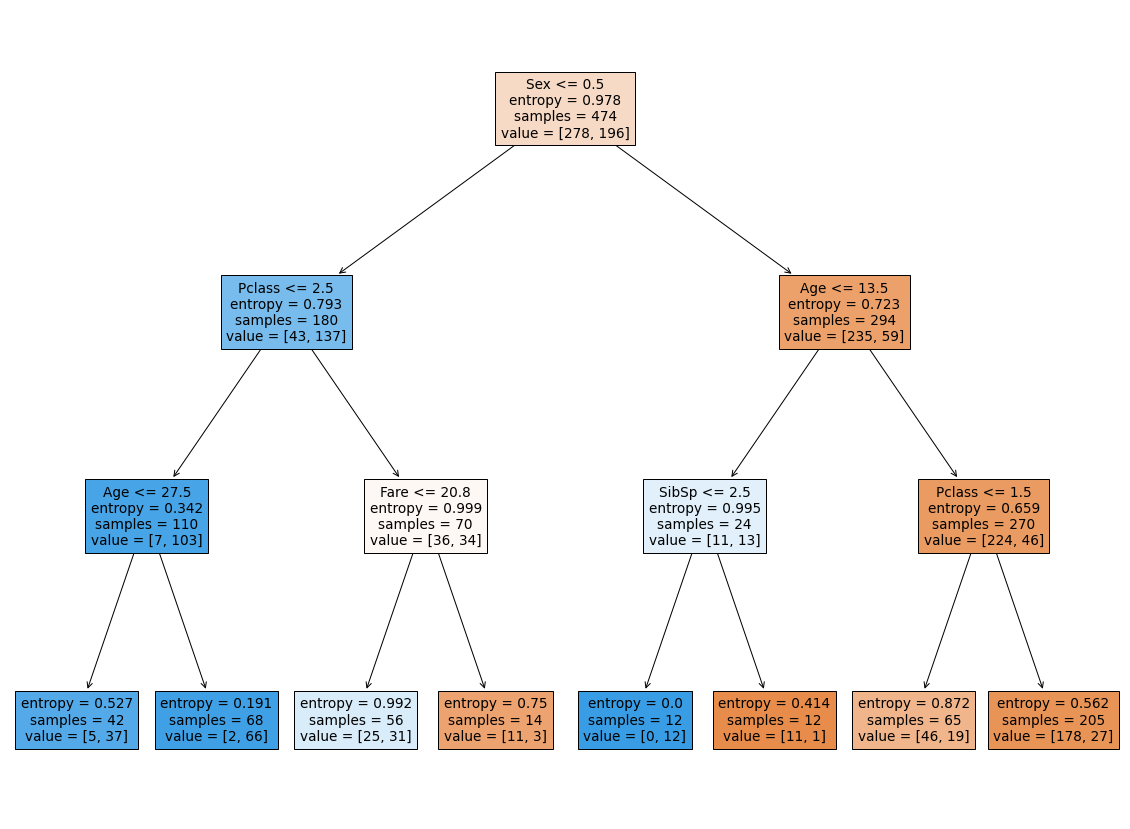

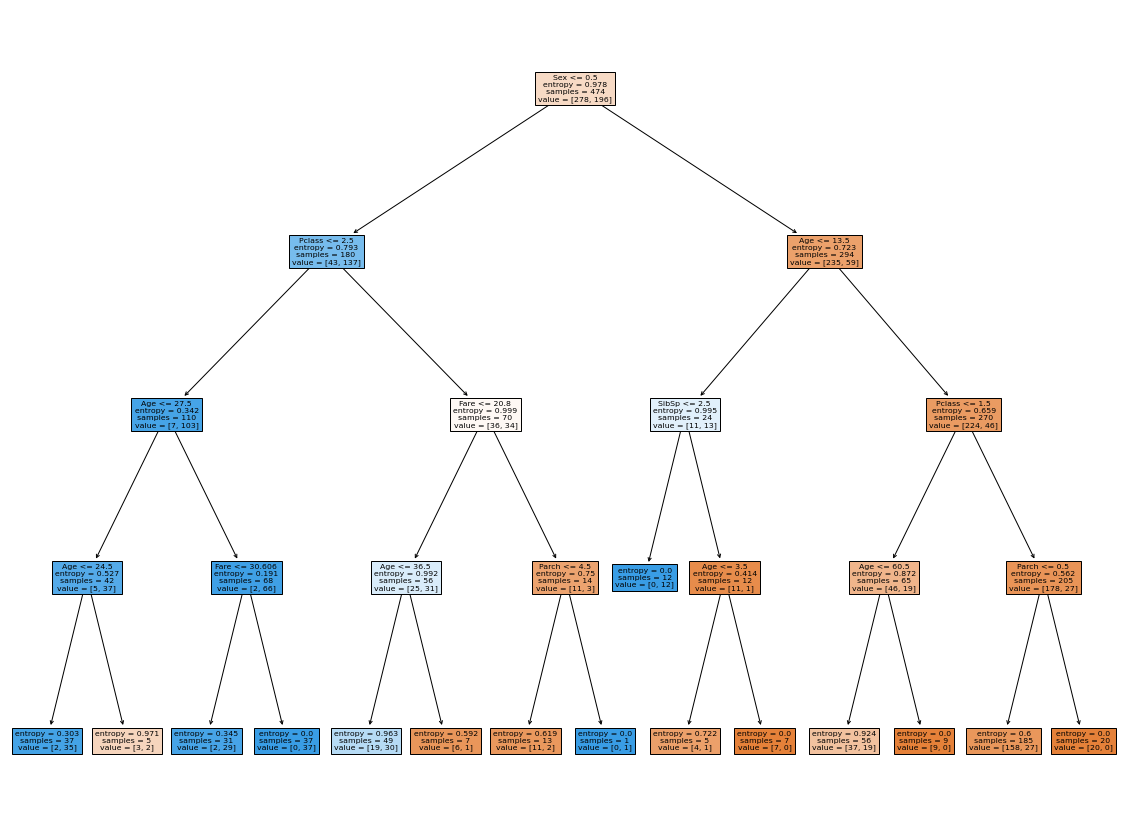

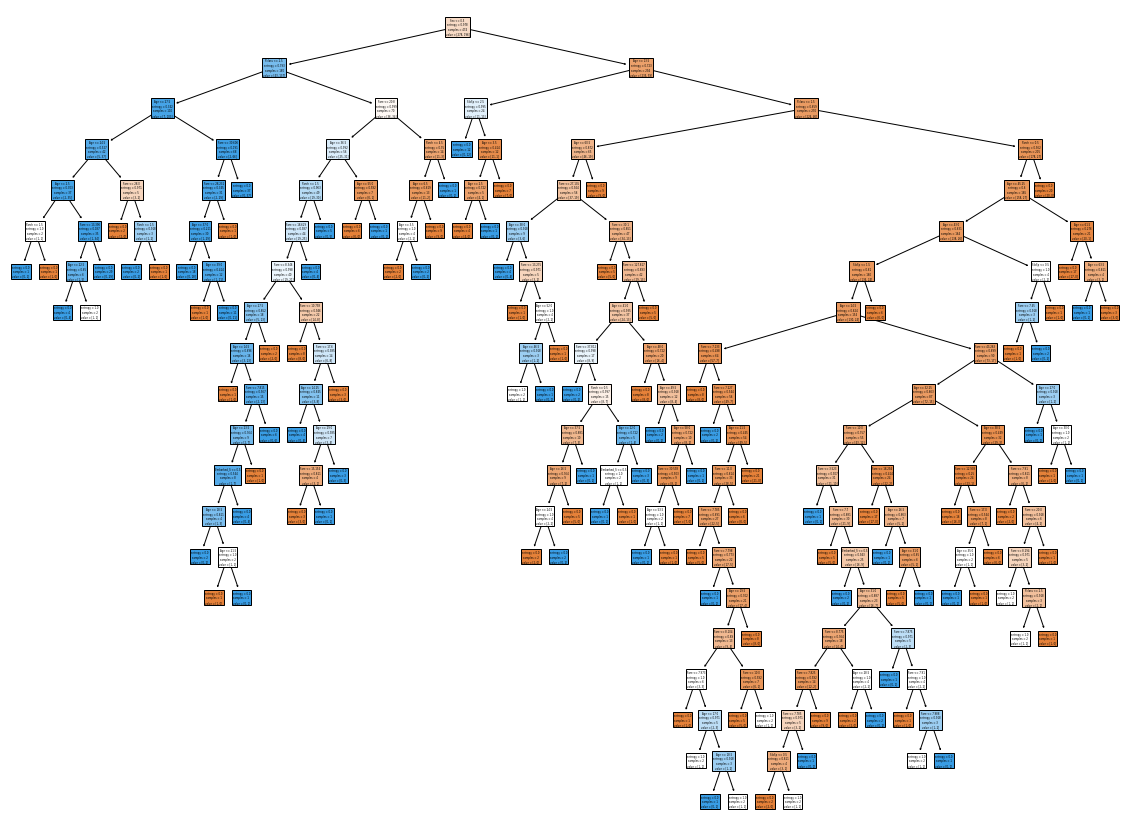

In [7]:
model_fitting(1)
model_fitting(2)
model_fitting(3)
model_fitting(4)
model_fitting(None)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(k):
    print("KNN (k={})".format(k))
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_X, train_Y)
              
    pred = neigh.predict(test_X)
    confusionMatrix(pred)

In [9]:
KNN(2)
KNN(3)
KNN(4)
KNN(5)

KNN (k=2)
[[129  17]
 [ 63  31]]
Accurcy :0.6666666666666666, F1-score :0.7633136094674556

KNN (k=3)
[[114  32]
 [ 38  56]]
Accurcy :0.7083333333333334, F1-score :0.7651006711409396

KNN (k=4)
[[128  18]
 [ 54  40]]
Accurcy :0.7, F1-score :0.7804878048780488

KNN (k=5)
[[119  27]
 [ 40  54]]
Accurcy :0.7208333333333333, F1-score :0.7803278688524591



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 평균 0 표준편차 1 : StandardScaler()
scaler = StandardScaler() 

X_train_sclaed = scaler.fit_transform(train_X)
X_test_sclaed = scaler.fit_transform(test_X)

In [11]:
def logistic(regular,max_iter,C):
    print("max_iter = {}, C = {}".format(max_iter,C))
    log = LogisticRegression(max_iter = max_iter,C=C)
    if(regular):    
        log.fit(X_train_sclaed,train_Y)
        pred = log.predict(X_test_sclaed)
    else:
        log.fit(train_X,train_Y)
        pred = log.predict(test_X)
    confusionMatrix(pred)
    # print(log.coef_,"\n")

In [12]:
for i in range(1,6):
    logistic(True,100,i)

max_iter = 100, C = 1
[[126  20]
 [ 27  67]]
Accurcy :0.8041666666666667, F1-score :0.8428093645484949

max_iter = 100, C = 2
[[124  22]
 [ 27  67]]
Accurcy :0.7958333333333333, F1-score :0.8350168350168349

max_iter = 100, C = 3
[[124  22]
 [ 27  67]]
Accurcy :0.7958333333333333, F1-score :0.8350168350168349

max_iter = 100, C = 4
[[124  22]
 [ 27  67]]
Accurcy :0.7958333333333333, F1-score :0.8350168350168349

max_iter = 100, C = 5
[[124  22]
 [ 27  67]]
Accurcy :0.7958333333333333, F1-score :0.8350168350168349

